### last modified in 28-05-2019 12:00 by afek adler

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

"""
Notice: ignore warnings is suitable for display but not preferred when writing code
"""
import warnings
warnings.filterwarnings('ignore')

# First glence of the data

In [2]:
df = pd.read_csv('avocado.csv',index_col = 0)
def first_glence(df):
    """
    suitable only for jupyter because the display function doesn't exist in python
    :param df: pandas_dataframe
    :param save_csv: if dave the details to csv
    :return: None
    """
    frames = {}
    frames['head'] = df.head(2)
    frames['missing_values'] = df.isna().sum() / df.shape[0]
    frames['dtypes'] = df.dtypes
    frames.update({dtype: df.select_dtypes(include=[dtype]).describe() for dtype in df.dtypes.unique()})
    for frame_name, frame in frames.items():
        print('{} :'.format(frame_name))
        print("***" * 10)
        display(frame)
        print('\n')
first_glence(df)

head :
******************************


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany




missing_values :
******************************


Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
dtype: float64



dtypes :
******************************


Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object



object :
******************************


,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2017-02-26,conventional,Plains
freq,108,9126,338




float64 :
******************************


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000




int64 :
******************************


,year
count,18249.000000
mean,2016.147899
std,0.939938
min,2015.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


# #1 Exploratory data analysis on the chosen data set, as you see fit, and use of  regression to provide some insights into the key effects you observe. To wit, what explanatory variables impact the dependent variable, their statistical significance, and the extent to which the dependent variable is sensitive to changes in these variables (including elasticity estimates). 

# there are ~50 region:
1. we will focus on 8 regions in the east coast
2. the type column indicates the type of the avocado - there are regular and organic ones

In [3]:
print ('unique regions: ')
display(df.region.unique())
# we choose to focus on some main cities in the us east coast
cities = ['Atlanta','Boston','Chicago','Detroit', 'Orlando', 'Philadelphia','NewYork','Nashville']
df = df[df.region.isin(cities)]
df_conventional = df[df.type == 'conventional']
df_organic = df[df.type == 'organic']
print ('we will focus on these regions: {}'.format(cities))

unique regions: 


array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

we will focus on these regions: ['Atlanta', 'Boston', 'Chicago', 'Detroit', 'Orlando', 'Philadelphia', 'NewYork', 'Nashville']


# CORREALATION PLOT
#### of the total volume avocado sold in (2015-2019)

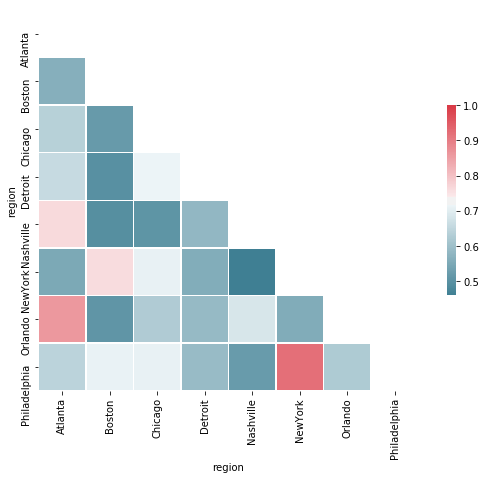

In [4]:
corr = df_conventional.pivot('Date','region','Total Volume').corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Demand as function of the price:
1. regular Avocados 
2. organic avocado

(0.5, 2.25)

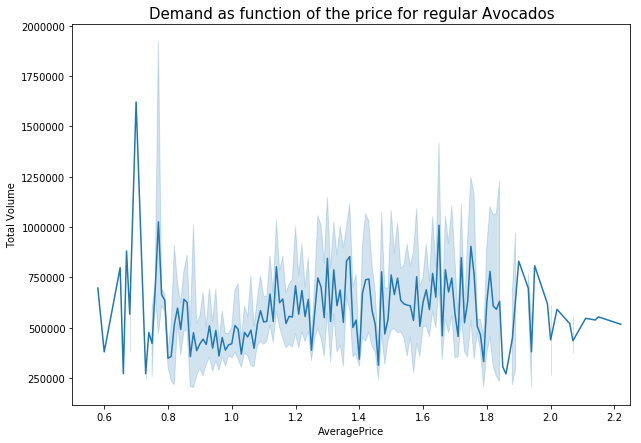

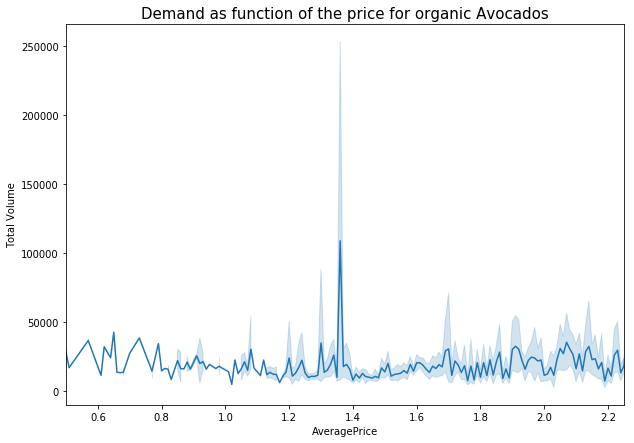

In [5]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_conventional, x = 'AveragePrice', y ='Total Volume')
ax.set_title("Demand as function of the price for regular Avocados", size = 15)
ax.set_xlim(0.5,2.25)

plt.figure(figsize=(10,7))
ax = sns.lineplot(data = df_organic, x = 'AveragePrice', y ='Total Volume' )
ax.set_title("Demand as function of the price for organic Avocados", size = 15)
ax.set_xlim(0.5,2.25)

# We will choose to focus either on 4225 Avocados sold or Total Volume sold
#### let's plot their volumein order to understand which one is more "intersting"

Text(0.5, 0.98, 'Demand function of the price for regular 4225 Avocados \n By city')

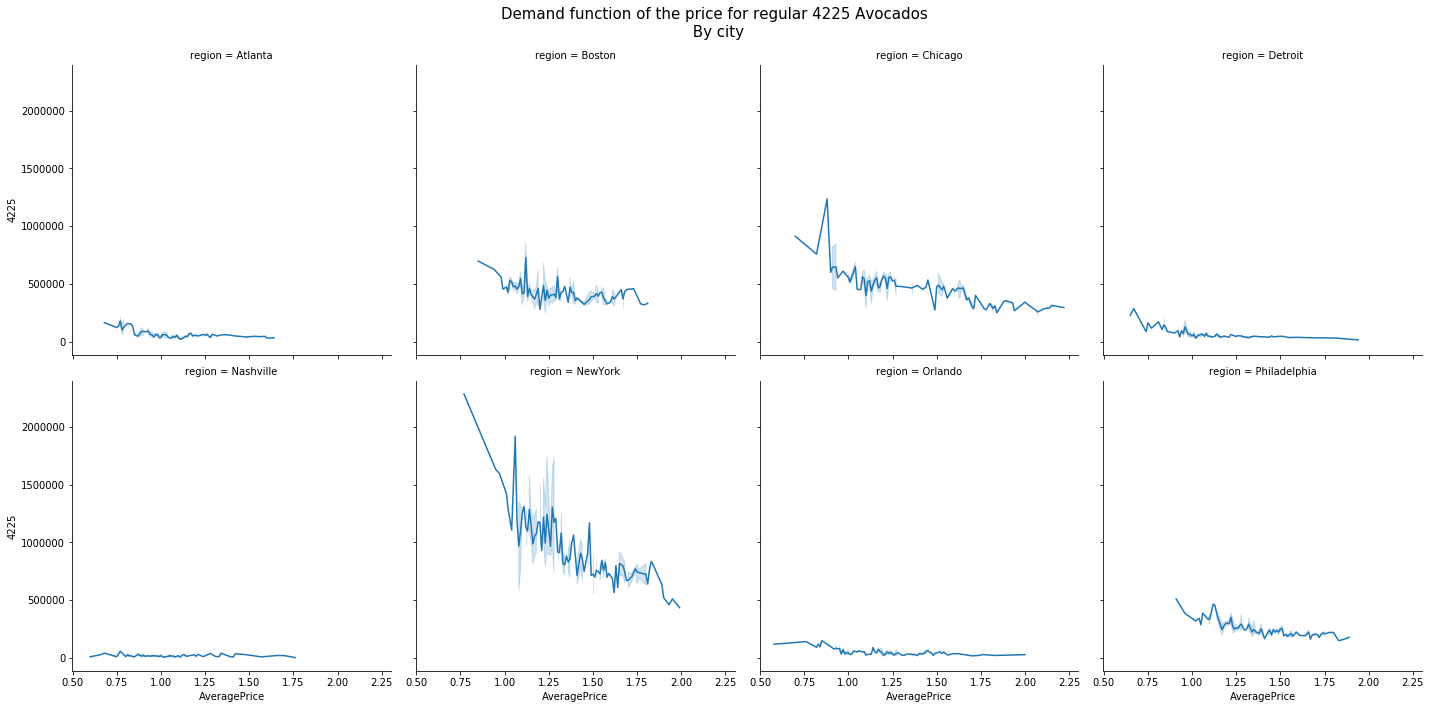

In [6]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', '4225' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for regular 4225 Avocados \n By city', size = 15) 

Text(0.5, 0.98, 'Demand function of the price for Total Volume of Avocados \n By city')

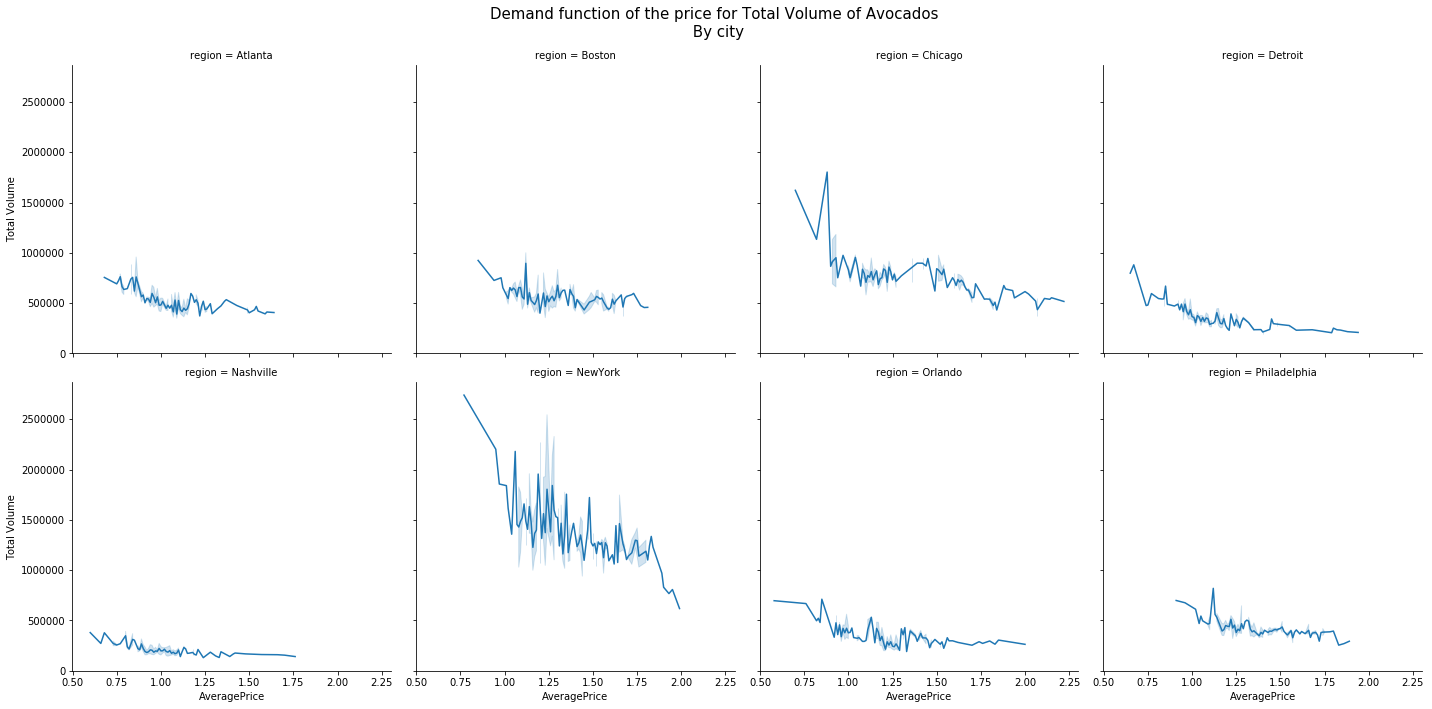

In [7]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', 'Total Volume' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for Total Volume of Avocados \n By city', size = 15) 

## Based on the above graphs We will choose to focus on Total Volume sold because some cities don't cell 4225 avocados 

# Add temporal columns and plot temporal relations

In [8]:
df_conventional = df_conventional[['Date','AveragePrice','Total Volume','year','region']]
df_conventional.Date = df_conventional.Date.astype('datetime64')
df_conventional['month'] = df_conventional.Date.dt.month
df_conventional['week'] = df_conventional.Date.dt.week
df_conventional.head()

,Date,AveragePrice,Total Volume,year,region,month,week
0,2015-12-27,0.99,386100.49,2015,Atlanta,12,52
1,2015-12-20,1.08,331377.53,2015,Atlanta,12,51
2,2015-12-13,0.96,417772.47,2015,Atlanta,12,50
3,2015-12-06,1.07,357636.82,2015,Atlanta,12,49
4,2015-11-29,0.99,333280.79,2015,Atlanta,11,48


Text(0.5, 0.98, 'Total Volume of Avocados By week \n By city')

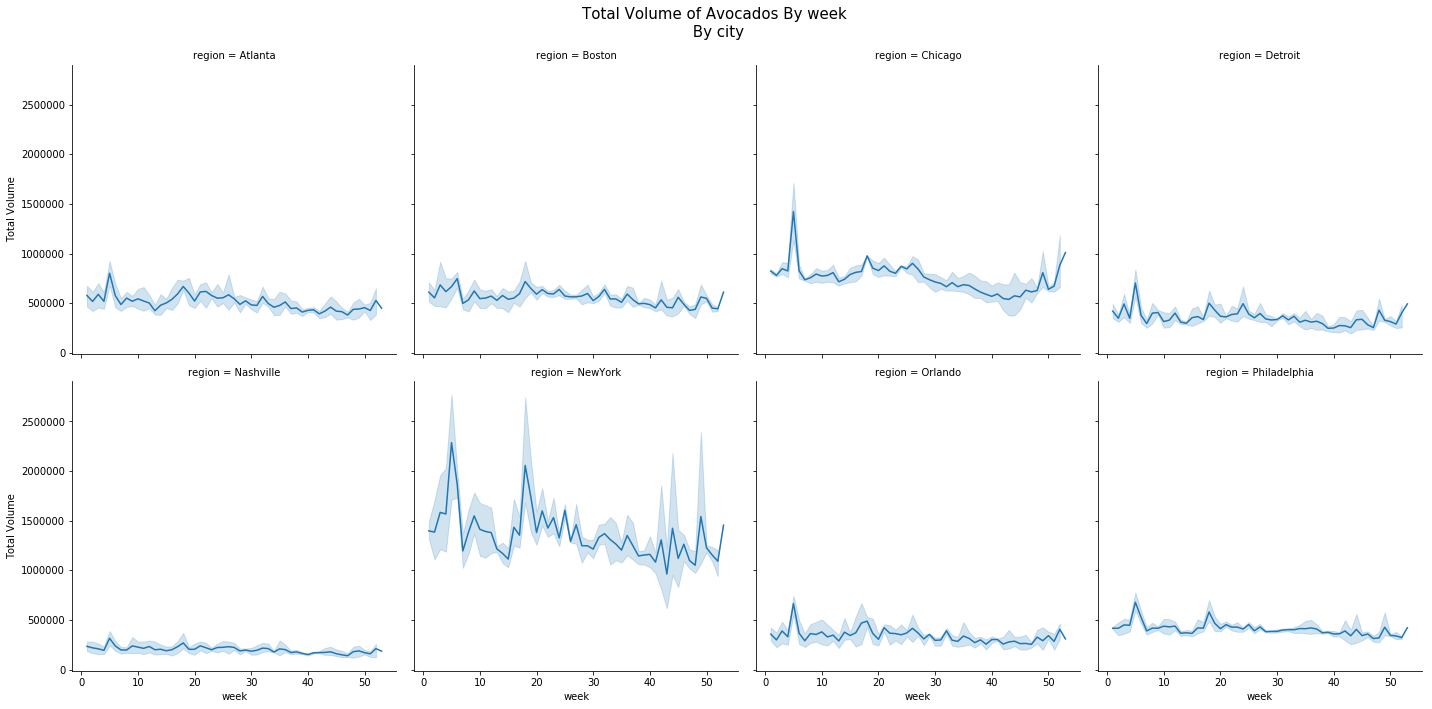

In [9]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'week', 'Total Volume' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Total Volume of Avocados By week \n By city', size = 15) 

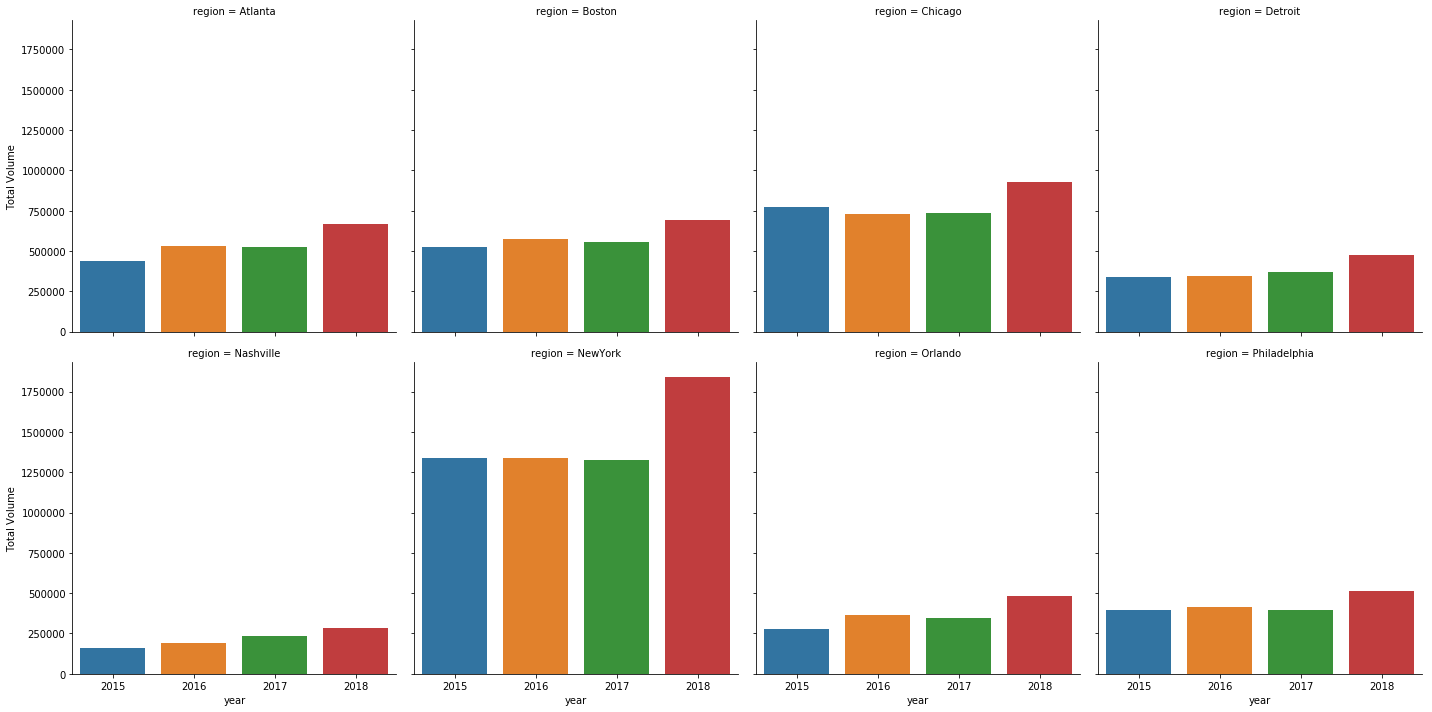

In [10]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.barplot,'year', 'Total Volume',ci=None, palette = sns.color_palette())

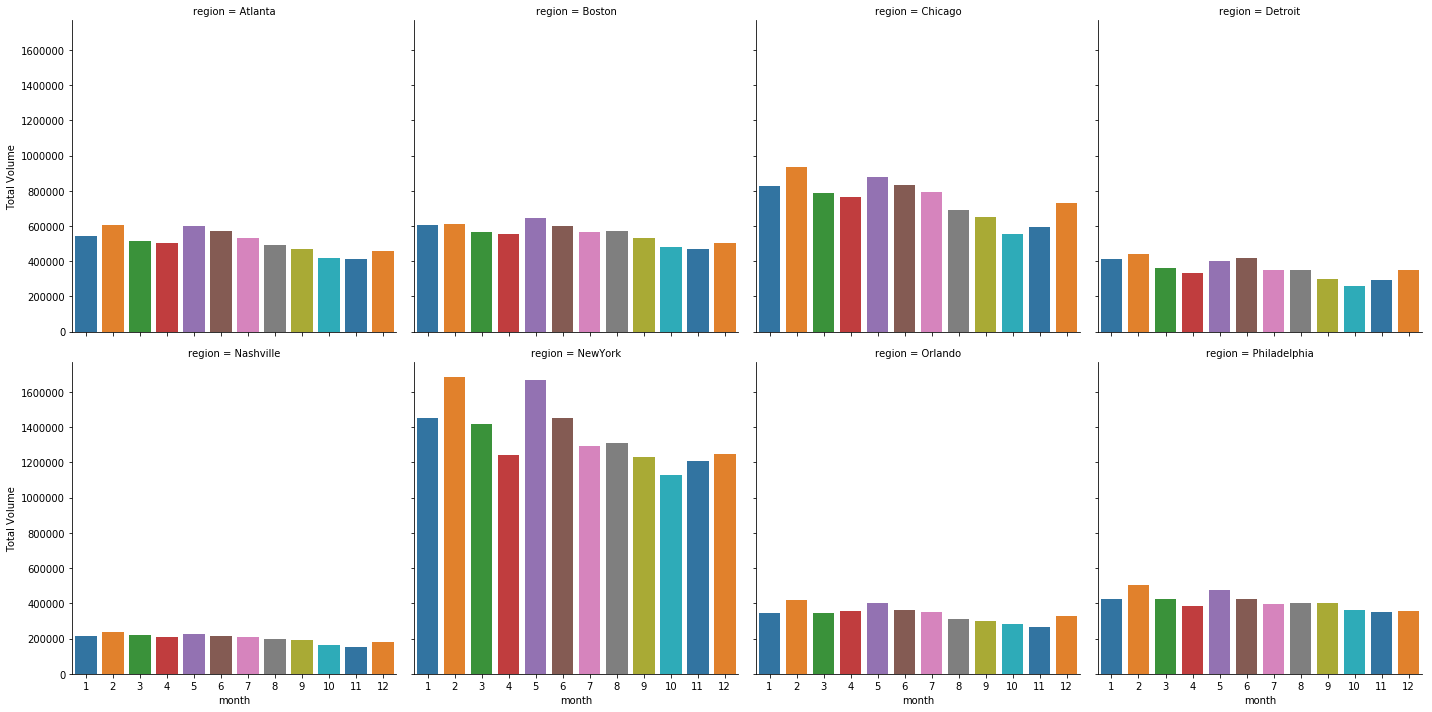

In [11]:
g = sns.FacetGrid(df_conventional, col= "region",col_wrap=4, height = 5)
g.map(sns.barplot,'month', 'Total Volume',ci=None, palette = sns.color_palette())

# Running ordinary least squares regression in order to estimate demand
##### Of course, we can use more complicated regressors such as neural nets, svm,
##### but then it will be more complex to find the best price

In [12]:
X = df_conventional[['region','month','AveragePrice','year']]
for col in ['month','region','year']:
    X[col] = X[col].astype('category')
y = df_conventional['Total Volume']

X_with_dummies = pd.get_dummies(X, drop_first = True)
import statsmodels.api as sm
from scipy import stats
X_with_dummies= sm.add_constant(X_with_dummies)
est = sm.OLS(y, X_with_dummies)
est = est.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Volume   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     589.0
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        17:52:41   Log-Likelihood:                -17676.
No. Observations:                1352   AIC:                         3.540e+04
Df Residuals:                    1329   BIC:                         3.552e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.872e+05   2

# create a normalized 'Total Volume' column for future analysis and save to_csv
### the normalization is StandardScaler (Z score) per city 

In [13]:
X_norm = df_conventional[['region','month','AveragePrice','year' ,'Total Volume']]
stats_dict = X_norm[['region','Total Volume']].groupby('region').agg(['mean','std'])['Total Volume'].to_dict()
def norm_row(row):
    return (row['Total Volume'] - stats_dict['mean'][row['region']])/stats_dict['std'][row['region']]
X_norm['Total_Volume_Norm'] = X_norm.apply(norm_row, axis = 1)
X_norm.to_csv('avocado_dataset_filtered.csv')

# Now after normalizaton we expect the graphs to be more simmiliar

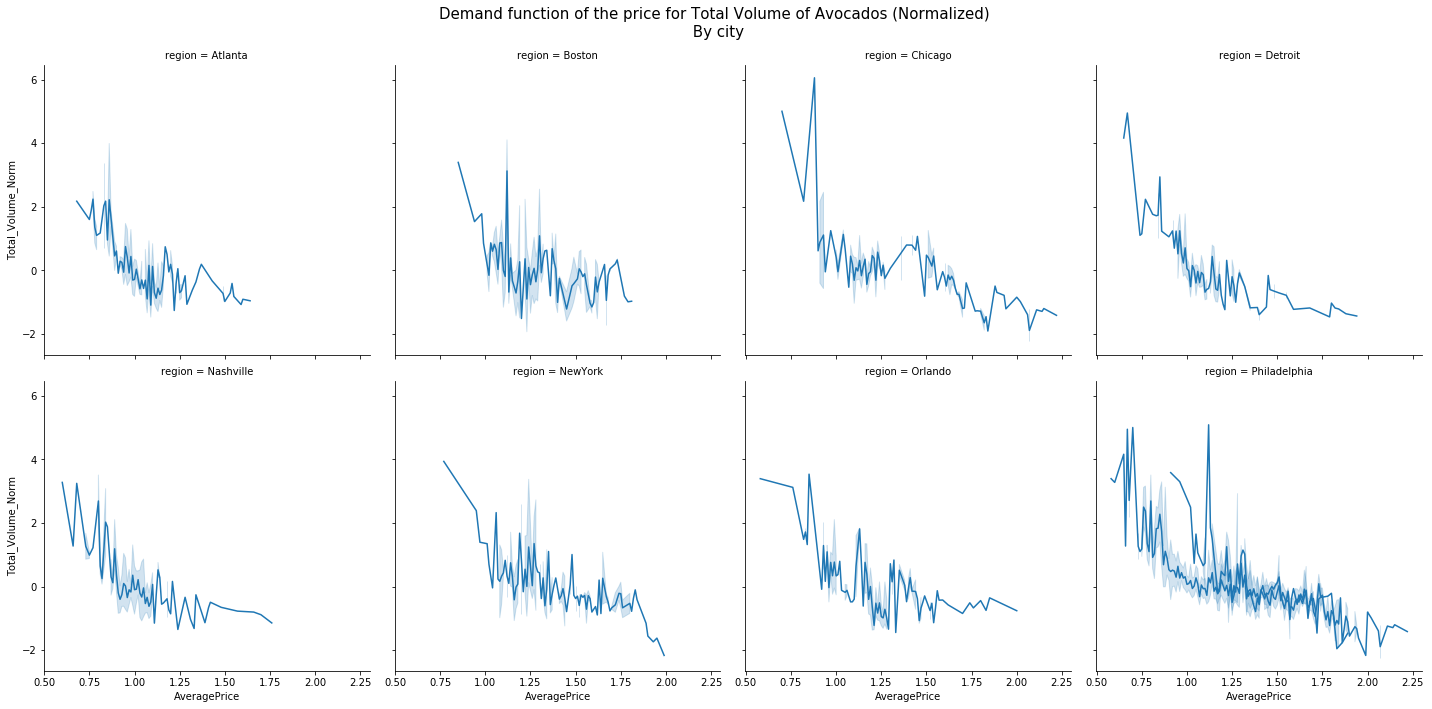

In [14]:
g = sns.FacetGrid(X_norm , col= "region",col_wrap=4, height = 5)
g.map(sns.lineplot,'AveragePrice', 'Total_Volume_Norm' )
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Demand function of the price for Total Volume of Avocados (Normalized) \n By city', size = 15) 
sns.lineplot(data = X_norm,x = 'AveragePrice', y = 'Total_Volume_Norm' )

(0.5, 2.25)

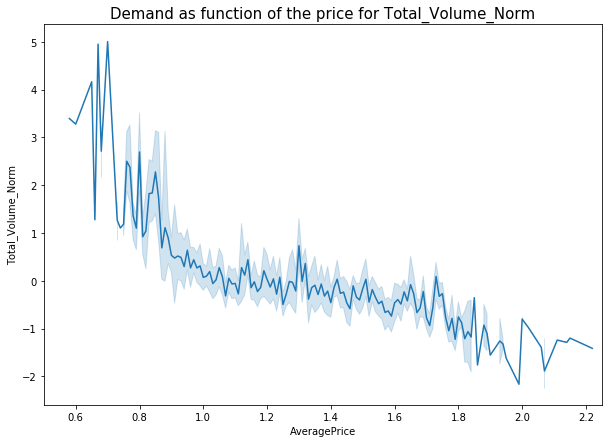

In [15]:
plt.figure(figsize=(10,7))
ax = sns.lineplot(data = X_norm,x = 'AveragePrice', y = 'Total_Volume_Norm' )
ax.set_title("Demand as function of the price for Total_Volume_Norm", size = 15)
ax.set_xlim(0.5,2.25)

# Estimation of Elasticity of Demand for all cities together

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     101.2
Date:                Thu, 06 Jun 2019   Prob (F-statistic):           4.72e-22
Time:                        17:52:55   Log-Likelihood:                -917.05
No. Observations:                 580   AIC:                             1838.
Df Residuals:                     578   BIC:                             1847.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4474      0.055     -8.143      0.0

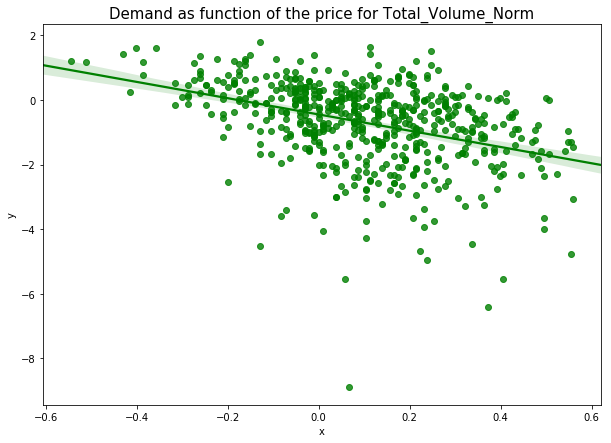

In [16]:
regression_df= pd.DataFrame()
regression_df['x'] = np.log(X_norm['AveragePrice'])
regression_df['y'] = np.log(X_norm['Total_Volume_Norm'])
X = regression_df.dropna()['x']
plt.figure(figsize=(10,7))
ax = sns.regplot(x= X , y= regression_df.dropna()['y'] , color="g")
ax.set_title("Demand as function of the price for Total_Volume_Norm", size = 15)
X = sm.add_constant(X)
est = sm.OLS(regression_df.dropna()['y'],X)
est = est.fit()
print(est.summary())

# Estimation of Elasticity of Demand for all cities separately

In [17]:
for city in X_norm.region.unique():
    frame = X_norm[X_norm.region == city]
    regression_df = pd.DataFrame()
    regression_df['x'] = np.log(frame['AveragePrice'])
    regression_df['y'] = np.log(frame['Total_Volume_Norm'])
    X = regression_df.dropna()['x']
    X = sm.add_constant(X)
    est = sm.OLS(regression_df.dropna()['y'],X)
    est = est.fit()
    print('#####'*10)
    print(city)
    print(np.abs(est.params['x']))

##################################################
Atlanta
4.113635273510457
##################################################
Boston
2.561369819243075
##################################################
Chicago
2.6809302750929547
##################################################
Detroit
6.760771864851739
##################################################
Nashville
3.333714912498329
##################################################
NewYork
4.344748226318521
##################################################
Orlando
3.2216916337293044
##################################################
Philadelphia
5.630464903671253


# #2 Formulation of a demand function model which is based on the regression you have run, and optimization of the estimated model to arrive at the  estimated optimal static price for your set up.

The demand function is linear in the input (X) as formulated in the linear regression above.
as a generalization of excercise 1 the - estimated optimal static price ;

\begin{equation*}
\hat p
= \frac{a +b_1x_1+ b_2x_2 \cdots + b_{n-1}x_{n-1}}{2b_n}
\end{equation*}

where $b_n$  is the coefficent of  $p$

# # 3	Analysis of variation and spread in observed prices relative to what you computed to be the optimal price based on your model. 

cross validation results


{'mean_fit_time': array([0.00347147]),
 'std_fit_time': array([0.00090991]),
 'mean_score_time': array([0.00176845]),
 'std_score_time': array([0.00043459]),
 'params': [{}],
 'split0_test_score': array([0.89436505]),
 'split1_test_score': array([0.93669825]),
 'split2_test_score': array([0.92050724]),
 'split3_test_score': array([0.80453854]),
 'split4_test_score': array([0.77310931]),
 'mean_test_score': array([0.86591718]),
 'std_test_score': array([0.06506941]),
 'rank_test_score': array([1]),
 'split0_train_score': array([0.90630794]),
 'split1_train_score': array([0.89975257]),
 'split2_train_score': array([0.90090843]),
 'split3_train_score': array([0.91004322]),
 'split4_train_score': array([0.92245522]),
 'mean_train_score': array([0.90789348]),
 'std_train_score': array([0.00817612])}

rmse is : 115248.80031864325


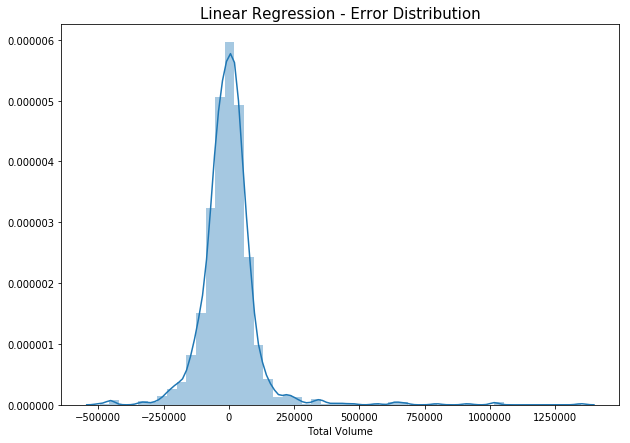

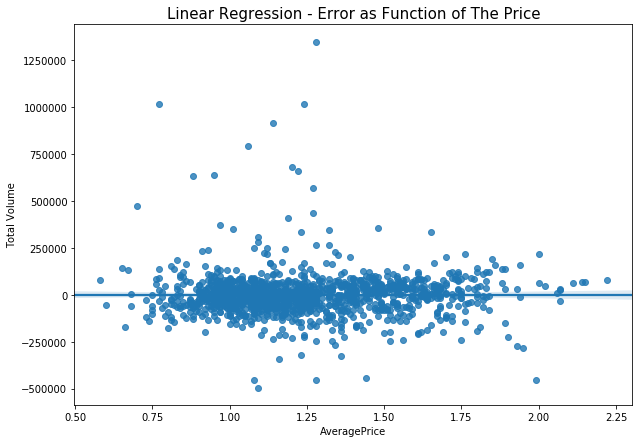

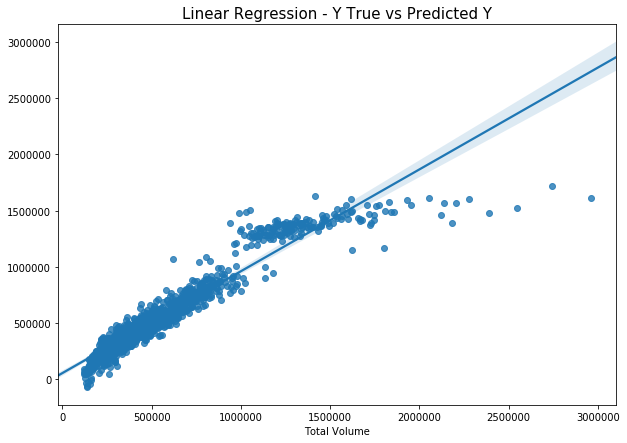

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from math import sqrt

CV = 5
lr = LinearRegression()
parameters = {}
clf = GridSearchCV(lr, parameters, cv=CV, scoring = 'r2')
clf.fit(X_with_dummies, y)
print ('cross validation results')
display(clf.cv_results_)

reg = clf.best_estimator_
error = y-reg.predict(X_with_dummies)
plt.figure(figsize=(10,7))
ax = sns.distplot(error)
ax.set_title("Linear Regression - Error Distribution", size = 15)

plt.figure(figsize=(10,7))
ax = sns.regplot(x= X_with_dummies['AveragePrice'], y= error)
ax.set_title("Linear Regression - Error as Function of The Price", size = 15)

plt.figure(figsize=(10,7))
ax = sns.regplot(x= y, y= reg.predict(X_with_dummies))
ax.set_title("Linear Regression - Y True vs Predicted Y", size = 15)

# compute rmse
rmse = sqrt(mean_squared_error(y, reg.predict(X_with_dummies)))
print ('rmse is : {}'.format(rmse))